## Preparing the raw data

Let's clean up and transform the data to fit this specification:

(which appears to be the best-fitting model, as we see later)

PropertyCrime = α + Population + Population^2 + Murder + Robbery

In [92]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
import statsmodels.formula.api as smf

In [93]:
df = pd.read_excel('../crime.xlsx', skiprows=4)

In [94]:
df.head(5)

,City,Population,Violent crime,Murder,Rape_revised,Rape_legacy,Robbery,Aggravated assault,Property_crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


## Creating features and building the regression model

In [95]:
df['Population^2'] = df['Population'] * df['Population']

In [106]:
df.loc[data['Property_crime'] > 100000]

,City,Population,Violent crime,Murder,Rape_revised,Rape_legacy,Robbery,Aggravated assault,Property_crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Population^2
216,New York,8396126,52384,1,NaN,1112,1,31767,141971,16606,117931,7434,NaN,70494931807876


In [96]:
df.loc[df['Murder'] > 0, 'Murder'] = 1
df.loc[df['Robbery'] > 0, 'Robbery'] = 1

In [97]:
data = df[['Population','Population^2','Murder','Robbery','Property_crime']]
data = data.dropna(axis=0, how='any')

# data['sqrtMurder'] = [math.sqrt(x) for x in data['Murder']]

X = data[['Population','Population^2','Murder','Robbery']]
Y = data['Property_crime']

The best performing regression model
Population, Population^2, Murder and Robbery

Coefficients: 
 [  1.29510871e-02   1.14920528e-07   1.95038666e+02   9.28205845e+01]

Intercept: 
 -16.8158663217

R-squared:
0.844493761117


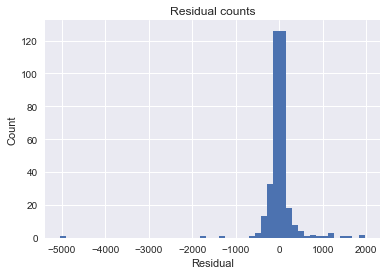

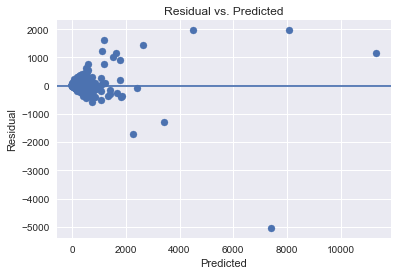

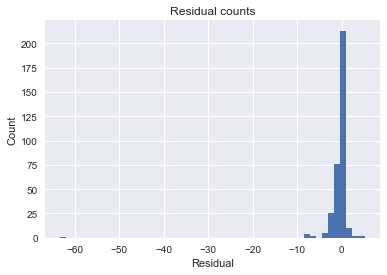

In [125]:
print('The best performing regression model')
print('Population, Population^2, Murder and Robbery')
regr = linear_model.LinearRegression()
regr.fit(X, Y) 
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
predicted = regr.predict(X)
actual = Y
residual = actual - predicted
rel_residual = residual / actual
plt.hist(residual, bins = 50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()


plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

residual_r = rel_residual.loc[abs(rel_residual) != np.inf]
plt.hist(residual_r, bins = 50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

ValueError: range parameter must be finite.

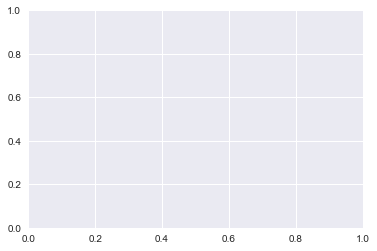

In [123]:
residual_r.hist()

### Questions to tackle: are those outliers? how to fight them?

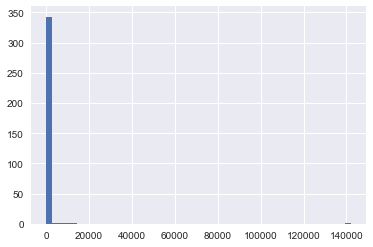

In [100]:
data.Property_crime.hist(bins=50)

In [101]:
data_new = data.loc[data['Property_crime'] < 100000]

In [102]:
X = data_new[['Population','Population^2','Murder','Robbery']]
Y = data_new['Property_crime']

The best performing regression model
Population, Population^2, Murder and Robbery

Coefficients: 
 [  1.29510871e-02   1.14920528e-07   1.95038666e+02   9.28205845e+01]

Intercept: 
 -16.8158663217

R-squared:
0.844493761117


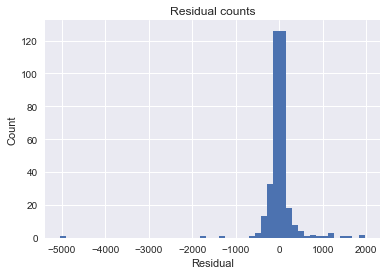

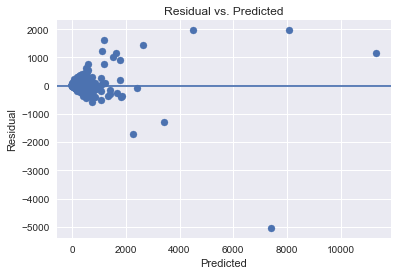

In [103]:
print('The best performing regression model')
print('Population, Population^2, Murder and Robbery')
regr = linear_model.LinearRegression()
regr.fit(X, Y) 
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
predicted = regr.predict(X)
actual = Y
residual = actual - predicted
plt.hist(residual, bins = 50)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

,Population,Population^2,Murder,Robbery,Property_crime
216,8396126,70494931807876,1,1,141971
